---

#  Date to iLOC Extrapolation

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas     as pd
import mplfinance as mpf
import datetime   as datetime
import numpy      as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [3]:
def date_to_mdate(date):
    """Convert a `date` to a matplotlib date:
    
    Input: `date` may be any of:
        (1) parseble string containing a date or datetime as a string,
        (2) python `datetime.date` or `datetime.datetime`,object
        (3) pandas.Timestamp object
    
    Returns a Matplotlib Date: floating point number of days from 01-Jan-0001, plus one day.
    """
    if isinstance(date,str):
        pydt = pd.to_datetime(date).to_pydatetime()
    elif isinstance(date,pd.Timestamp):
        pydt = date.to_pydatetime()
    elif isinstance(date,(datetime.datetime,datetime.date)):
        pydt = date
    else:
        return None
    return mdates.date2num(pydt)

In [4]:
def date_to_iloc(dtseries,date):
    d1s = dtseries.loc[date:]
    if len(d1s) < 1:
        sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
        raise ValueError('User specified line date "'+str(date)+
                         '" is beyond (greater than) range of plotted data ('+sdtrange+').')
    d1 = d1s.index[0]
    d2s = dtseries.loc[:date]
    if len(d2s) < 1:
        sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
        raise ValueError('User specified line date "'+str(date)+
                         '" is before (less than) range of plotted data ('+sdtrange+').')
    d2 = dtseries.loc[:date].index[-1]
    # If there are duplicate dates in the series, for example in a renko plot
    # then .get_loc(date) will return a slice containing all the dups, so:
    loc1 = dtseries.index.get_loc(d1)
    if isinstance(loc1,slice): loc1 = loc1.start
    loc2 = dtseries.index.get_loc(d2)
    if isinstance(loc2,slice): loc2 = loc2.stop - 1
    return (loc1+loc2)/2.0

In [5]:
def date_to_iloc_linear(dtseries,date,trace=True):
    d1 = date_to_mdate(dtseries.index[0])
    d2 = date_to_mdate(dtseries.index[-1])

    if trace: print('d1,d2=',d1,d2)
    i1 = 0.0
    i2 = len(dtseries) - 1.0
    if trace: print('i1,i2=',i1,i2)
    
    slope   = (i2 - i1) / (d2 - d1)
    yitrcpt = i1 - (slope*d1)
    if trace: print('slope,yitrcpt=',slope,yitrcpt)
    yitrcpt = i2 - (slope*d2)
    if trace: print('slope,yitrcpt=',slope,yitrcpt)
    return (slope,yitrcpt)
    
    
#     d2s = dtseries.loc[:date]
#     if len(d2s) < 1:
#         sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
#         raise ValueError('User specified line date "'+str(date)+
#                          '" is before (less than) range of plotted data ('+sdtrange+').')
#     d2 = dtseries.loc[:date].index[-1]
#     # If there are duplicate dates in the series, for example in a renko plot
#     # then .get_loc(date) will return a slice containing all the dups, so:
#     loc1 = dtseries.index.get_loc(d1)
#     if isinstance(loc1,slice): loc1 = loc1.start
#     loc2 = dtseries.index.get_loc(d2)
#     if isinstance(loc2,slice): loc2 = loc2.stop - 1
#     return (loc1+loc2)/2.0

In [6]:
# Read in daily data for the S&P 500 from November of 2019: 
#daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
#daily = pd.read_csv('../data/yahoofinance-SPY-20200901-20210113.csv',index_col=0,parse_dates=True)
daily = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.iloc[[0,-1]]
daily = daily.loc['2010-1-1':'2012-1-1',:]
daily.shape
daily.iloc[[0,-1]]

(2519, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,147.100006,147.610001,146.059998,146.210007,118.624741,108126800
2017-12-29,268.529999,268.549988,266.640015,266.859985,266.859985,96007400


(504, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,96.341141,118944600
2011-12-30,126.019997,126.330002,125.500000,125.500000,111.063309,95599000


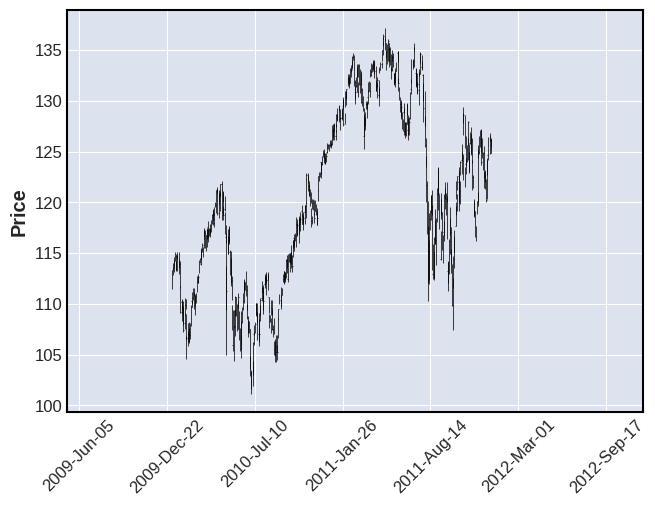

In [7]:
mpf.plot(daily,xlim=('2009-05-10','2012-12-10'),show_nontrading=True)

In [8]:
daily.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [9]:
ix = daily.index

In [10]:
ix[-1] - ix[0]

Timedelta('725 days 00:00:00')

In [11]:
date_to_mdate(ix[-1]) - date_to_mdate(ix[0])

725.0

In [12]:
725*(5./7.)

517.8571428571429

In [13]:
def generate_yxs(data,d1,d2,trace=True):
    #print('trace=',trace)
    #cpx = daily['Close']['2010-12-1':'2011-1-31']
    slice = data['Close'][d1:d2]
    if trace: 
        print('slice range:\n',slice.iloc[[0,-1]])
        print('\nlen(data),len(',d1,':',d2,')=',len(data),',',len(slice),'\n')

    m,b = date_to_iloc_linear(slice,0,trace)

    x = [x for x in range(len(data))]
    y = [y for y in data['Close'].values]

    #daily['Close']['2020-11-1':'2020-11-30']
    offset = len(data.loc[:slice.index[-1]]) - len(slice)
    if trace:
        print('offset=',offset)

    dates = mdates.date2num(data.index.to_pydatetime())
    
    x2 = [(m*d + b + offset) for d in dates]

    if trace:
        print('len(x),len(x2)=',len(x),len(x2))
    print('len(slice)=',len(slice),'len(data)=',len(data),'offset=',offset)
    return (x,x2,y)

In [14]:
x,x2,y = generate_yxs(daily,'2010-12-1','2011-1-31')

slice range:
 Date
2010-12-01    121.010002
2011-01-31    128.679993
Name: Close, dtype: float64

len(data),len( 2010-12-1 : 2011-1-31 )= 504 , 42 

d1,d2= 14944.0 15005.0
i1,i2= 0.0 41.0
slope,yitrcpt= 0.6721311475409836 -10044.327868852459
slope,yitrcpt= 0.6721311475409836 -10044.327868852459
offset= 230
len(x),len(x2)= 504 504
len(slice)= 42 len(data)= 504 offset= 230


In [15]:
%%capture
fig = plt.figure(figsize=(16,8))
ax  = fig.add_subplot()

In [16]:
# ax.scatter(x,y,s=300,marker='^',c='c')
# ax.scatter(x2,y,s=300,marker='v',c='m')
# ax.scatter( x,y,s=200,marker='d',c='c')
# ax.scatter(x2,y,s=200,marker='d',c='m')

ax.scatter( x,y,s=600,marker='_',c='c')
ax.scatter(x2,y,s=600,marker='_',c='m')
ax.scatter( x,y,s=600,marker=2,c='c')
ax.scatter(x2,y,s=600,marker=2,c='m')

#ax.scatter( x,yconst,s=1200,marker=2,c='c')
#ax.scatter(x2,yconst,s=1200,marker=3,c='m')

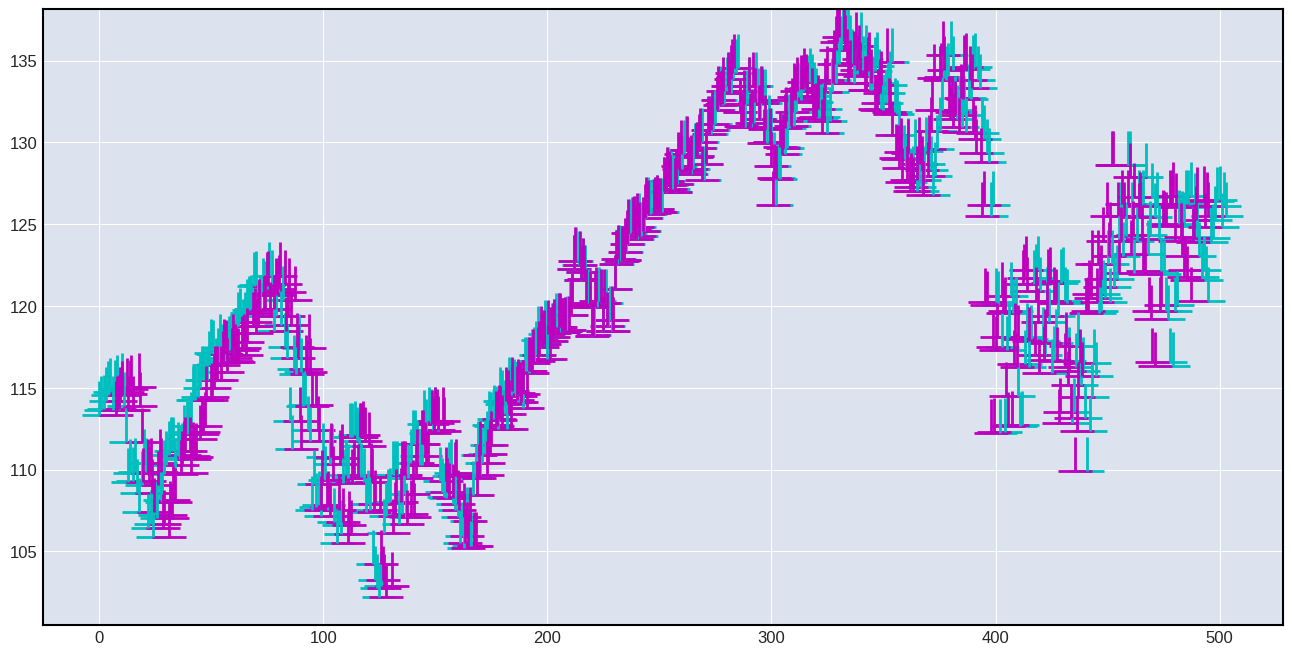

In [17]:
fig

In [18]:
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2

a = df['diff'] < 1.0 
b = df['diff'] > -1.0
df['fill'] = [ a and b for a,b in zip(a,b)]

print(df.iloc[[0,-1]])

         x          x2      diff   fill
0      0.0    7.524590 -7.524590  False
503  503.0  494.819672  8.180328  False


<AxesSubplot:>

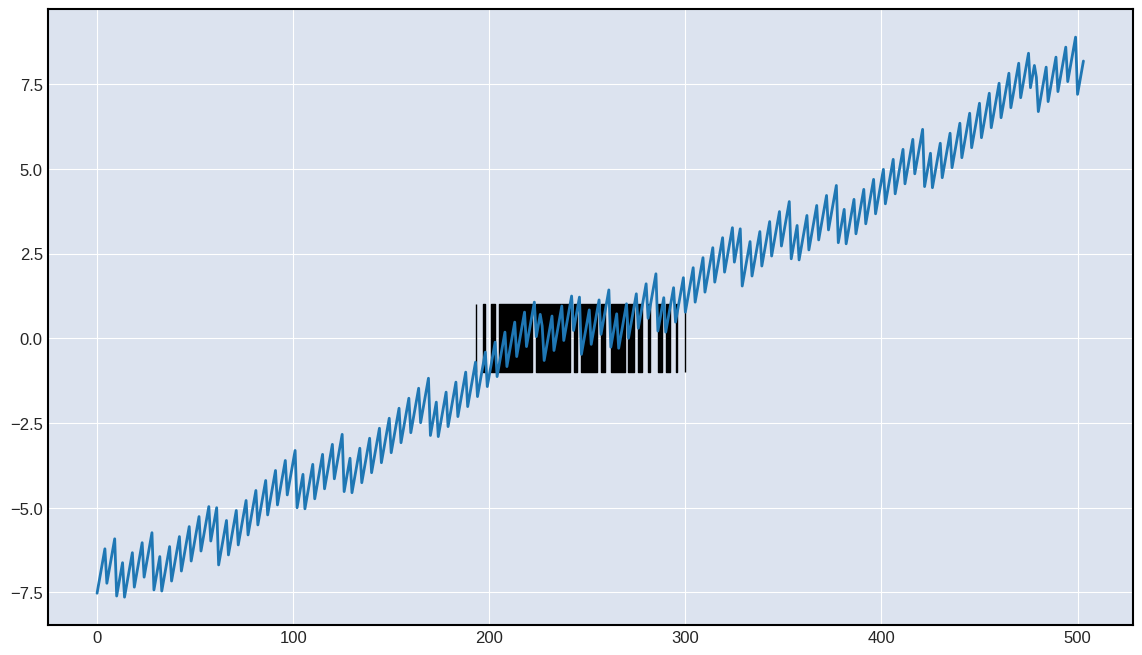

In [19]:
tdf = df['diff']
tdf.plot(figsize=(14,8))
#tdf.iloc[150:350].plot(figsize=(14,8))
#tdf.iloc[100:400].plot(figsize=(14,8))
#tdf.iloc[150:350].plot(figsize=(14,8))
#tdf.iloc[200:300].plot(figsize=(14,8))
#tdf.iloc[230:270].plot(figsize=(14,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=df['fill'].values,color='k')

len(slice)= 42 len(data)= 504 offset= 230


<AxesSubplot:>

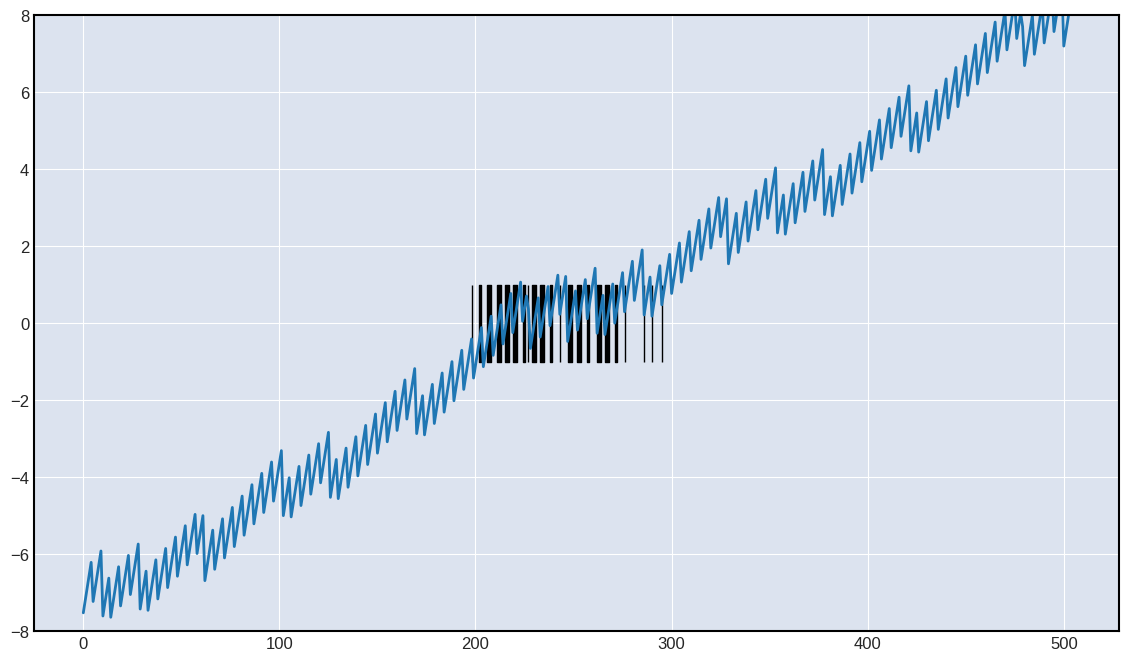

In [20]:
x,x2,y = generate_yxs(daily,'2010-12-1','2011-1-31',trace=False)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.5
b = df['diff'] > -0.5
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff']
tdf.plot(figsize=(14,8),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=df['fill'].values,color='k')

len(slice)= 83 len(data)= 504 offset= 209


<AxesSubplot:>

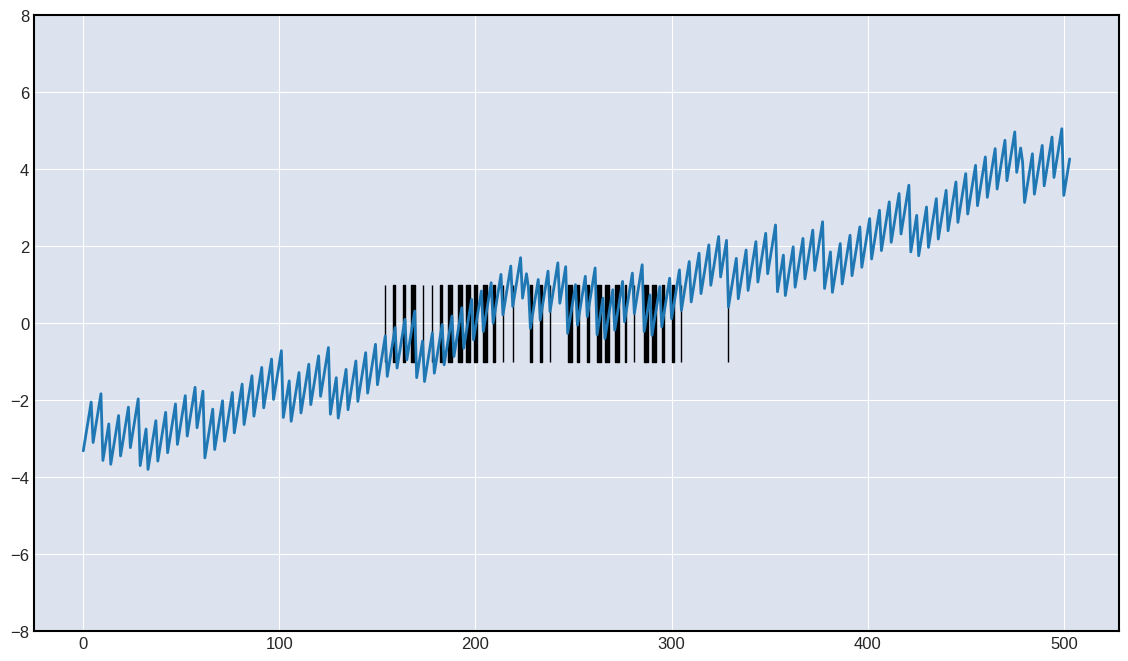

In [21]:
x,x2,y = generate_yxs(daily,'2010-11-1','2011-3-1',trace=False)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.5
b = df['diff'] > -0.5
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff']
tdf.plot(figsize=(14,8),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=df['fill'].values,color='k')

In [22]:
def generate_yxs_FROM_UTILS(data,d1,d2,trace=True,VERS=1):
    from mplfinance._utils import _date_to_iloc_extrapolate
    #from mplfinance._utils import _date_to_iloc_extrap_v2
    #from mplfinance._utils import _date_to_iloc_extrap_v3
    #from mplfinance._utils import _date_to_iloc_linear
    #print('trace=',trace)
    #cpx = daily['Close']['2010-12-1':'2011-1-31']
    slice = data['Close'][d1:d2]
    if trace: 
        print('slice range:\n',slice.iloc[[0,-1]])
        print('\nlen(data),len(',d1,':',d2,')=',len(data),',',len(slice),'\n')

    #m,b = date_to_iloc_linear(slice,0,trace)

    x = [x for x in range(len(data))]
    y = [y for y in data['Close'].values]

    #daily['Close']['2020-11-1':'2020-11-30']
    offset = len(data.loc[:slice.index[-1]]) - len(slice)
    if trace:
        print('offset=',offset)

    #dates = mdates.date2num(data.index.to_pydatetime())
    
    #if VERS == 3:
    #    x2 = [(_date_to_iloc_extrap_v3(slice,d) + offset) for d in data.index]
    #elif VERS == 2:
    #    x2 = [(_date_to_iloc_extrap_v2(slice,d) + offset) for d in data.index]
    #else:
    #    x2 = [(_date_to_iloc_extrapolate(slice,d) + offset) for d in data.index]
    x2 = [(_date_to_iloc_extrapolate(slice,d) + offset) for d in data.index]
    
    if trace:
        print('len(x),len(x2)=',len(x),len(x2))
    print('len(slice)=',len(slice),'len(data)=',len(data),'offset=',offset)
    return (x,x2,y)


len(slice)= 42 len(data)= 504 offset= 230


<AxesSubplot:>

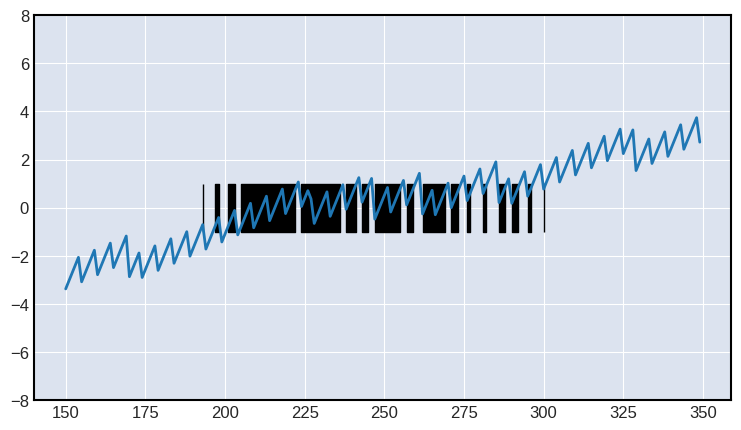

In [23]:
x,x2,y = generate_yxs(daily,'2010-12-1','2011-1-31',trace=False)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.95
b = df['diff'] > -0.95
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff'].iloc[150:350]
whr = df['fill'].iloc[150:350].values
tdf.plot(figsize=(9,5),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=whr,color='k')

len(slice)= 42 len(data)= 504 offset= 230


<AxesSubplot:>

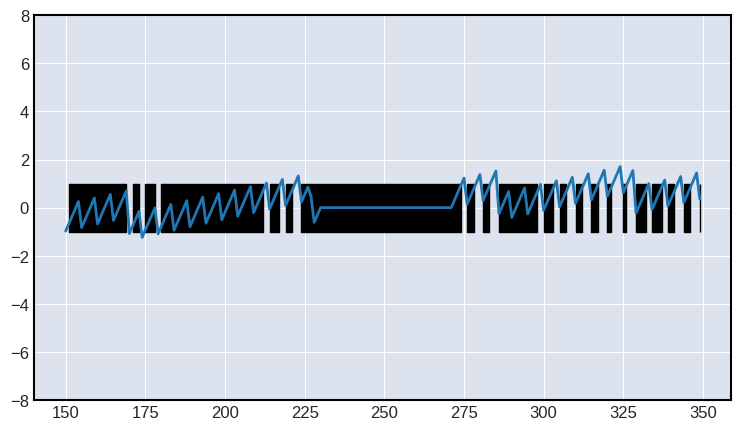

In [24]:
x,x2,y = generate_yxs_FROM_UTILS(daily,'2010-12-1','2011-1-31',trace=False)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.95
b = df['diff'] > -0.95
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff'].iloc[150:350]
whr = df['fill'].iloc[150:350].values
tdf.plot(figsize=(9,5),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=whr,color='k')

len(slice)= 82 len(data)= 504 offset= 209


<AxesSubplot:>

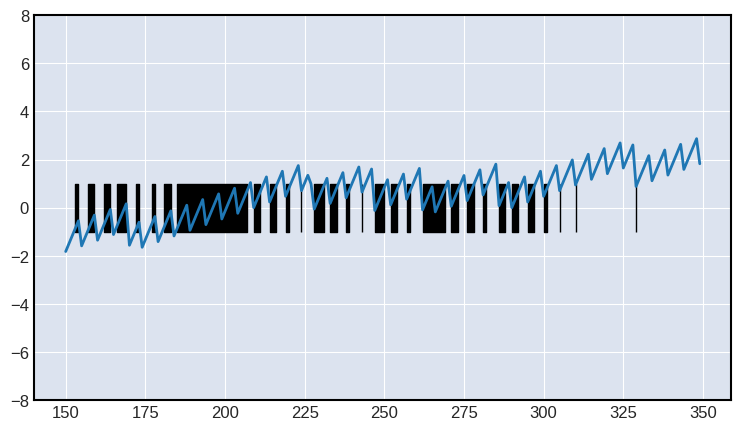

In [25]:
x,x2,y = generate_yxs(daily,'2010-11-1','2011-2-28',trace=False)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.95
b = df['diff'] > -0.95
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff'].iloc[150:350]
whr = df['fill'].iloc[150:350].values
tdf.plot(figsize=(9,5),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=whr,color='k')

len(slice)= 82 len(data)= 504 offset= 209


<AxesSubplot:>

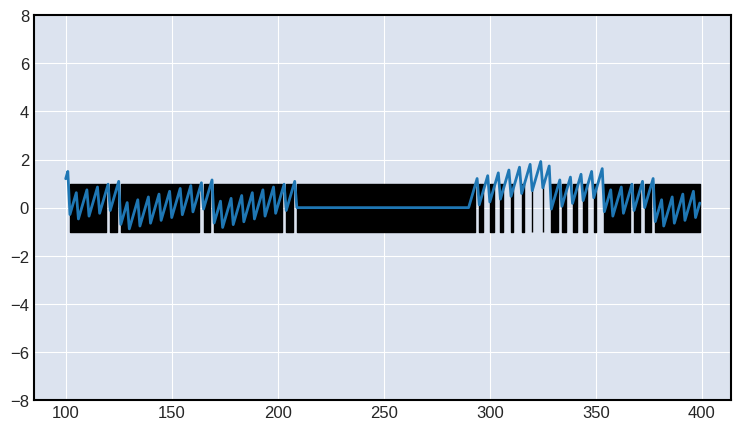

In [26]:
x,x2,y = generate_yxs_FROM_UTILS(daily,'2010-11-1','2011-2-28',trace=False)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.95
b = df['diff'] > -0.95
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff'].iloc[100:400]
whr = df['fill'].iloc[100:400].values
tdf.plot(figsize=(9,5),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=whr,color='k')

len(slice)= 82 len(data)= 504 offset= 209


<AxesSubplot:>

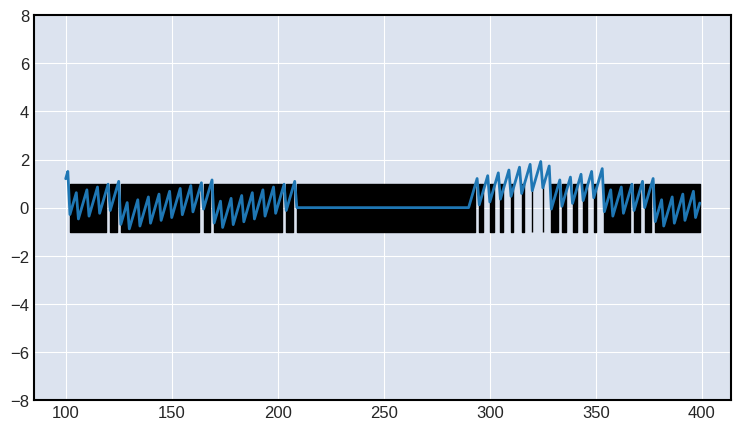

In [27]:
x,x2,y = generate_yxs_FROM_UTILS(daily,'2010-11-1','2011-2-28',trace=False,VERS=3)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.95
b = df['diff'] > -0.95
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff'].iloc[100:400]
whr = df['fill'].iloc[100:400].values
tdf.plot(figsize=(9,5),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=whr,color='k')

len(slice)= 82 len(data)= 504 offset= 209


<AxesSubplot:>

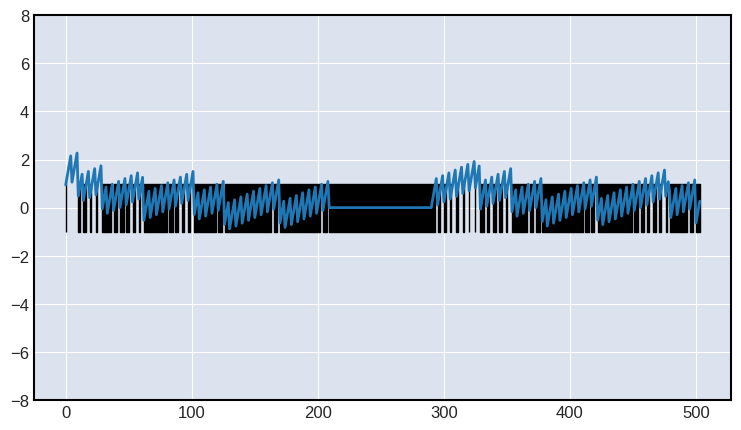

In [28]:
x,x2,y = generate_yxs_FROM_UTILS(daily,'2010-11-1','2011-2-28',trace=False,VERS=3)
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
a = df['diff'] < 0.95
b = df['diff'] > -0.95
df['fill'] = [ a and b for a,b in zip(a,b)]
#print(df.iloc[[0,-1]])
tdf = df['diff'].iloc[0:]
whr = df['fill'].iloc[0:].values
tdf.plot(figsize=(9,5),ylim=(-8,8))
plt.fill_between(tdf.index,y1=1.0,y2=-1.0,where=whr,color='k')

In [29]:
df = pd.read_csv('../data/SP500_NOV2019_IDayRVol.csv',index_col=0,parse_dates=True)
df.index.name = 'Date'
df.shape
df.iloc[[0,-1]]
tdf = df.iloc[0:599]
tdf.shape
tdf.iloc[[0,1,-2,-1]]

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,2209795
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,1023516


(599, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,2209795
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,1739410
2019-11-06 12:56:00,3068.85,3068.76,3068.90,3068.74,1582534
2019-11-06 12:57:00,3068.76,3068.82,3068.92,3068.56,2167685


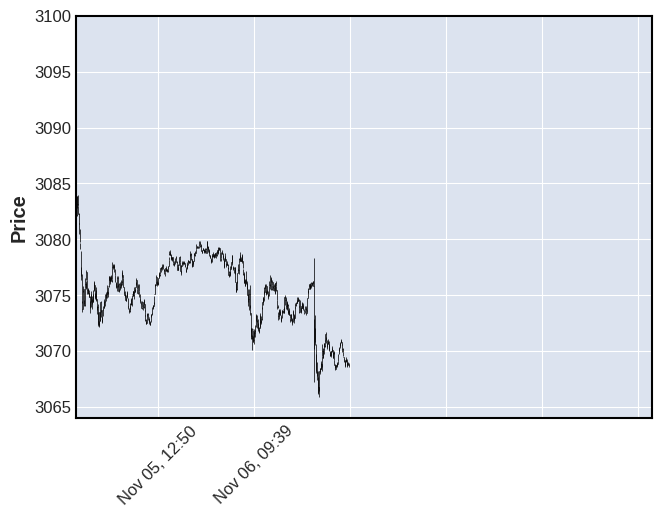

In [30]:
mpf.plot(tdf,xlim=('2019-11-05 10:00','2019-11-07 18:00'),ylim=(3064,3100))

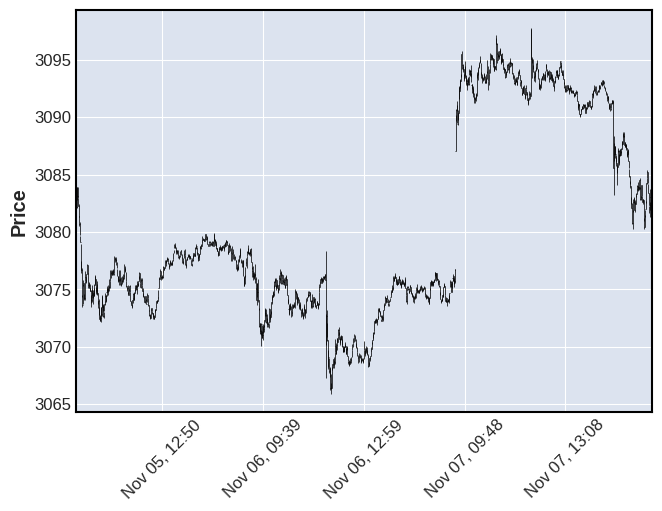

In [31]:
mpf.plot(df,xlim=('2019-11-05 10:00','2019-11-07 18:00'),warn_too_much_data=2000)

In [32]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
def generate_trend_line(series,date1,date2,price1=None,price2=None,show_nontrading=False,forward_only=False):
    """Return a trend line given two dates and a time-series.
       Input: Pandas series with a pandas.DatetimeIndex, and two dates:
              The two dates are used to determine two "prices" from the series, 
              or the prices may optionally be specified as `price1` and `price1`.
              `show_nontrading` optionally indicates that time-axis is continuous with respect to time
              `forward_only` optionally indicates whether to extrapolate both backwards and forwards, or forward only.
            
       Output: Trend line as 
    """
    if not isinstance(series,pd.Series):
        raise TypeError('First argument must be a Pandas.Series')
    index = series.index
    if not isinstance(index,pd.DatetimeIndex):
        raise TypeError('First argument, pandas.Series, MUST HAVE A Pandas.DatetimeIndex')
        
    p1 = series[date1] if price1 is None else price1
    p2 = series[date2] if price2 is None else price2

    if show_nontrading:
        d1 = date_to_mdate(date1)
        d2 = date_to_mdate(date2)
    else:
        d1 = float(index.get_loc(date1))
        d2 = float(index.get_loc(date2))
        
    slope = (p2-p1)/(d2-d1)
    yintercept = ((p1 - slope*d1) + (p2 - slope*d2)) / 2.0

    if show_nontrading:
        dates = mdates.date2num(index.tz_localize(None).to_pydatetime())
    else:
        dates = range(0,len(index))
        
    trend_line = []
    for dt in dates:
        trend_line.append(slope*dt + yintercept)
    if forward_only:
        ixd1 = index.get_loc(date1)
        for jj in range(0,ixd1):
            trend_line[jj] = np.nan

    return pd.Series(trend_line,index=index)